In [1]:
from aeon.registry import all_estimators


estimators_list = all_estimators(
    filter_tags={"capability:multivariate": True},
    estimator_types="classifier",
    as_dataframe=True,
)

print(str(estimators_list.estimator[0]).split("."))




["<class 'aeon", 'classification', 'convolution_based', '_arsenal', "Arsenal'>"]


In [2]:
import importlib
from librosa import ex
import numpy as np

tmp = []

for idx in range (len(estimators_list)):
    try:
        base_name = str(estimators_list.estimator[idx]).split(".")[2]
        module_name = str(estimators_list.estimator[idx]).split(".")[3]
        estimator_name = estimators_list.name[idx]
        if (
            estimator_name != "ChannelEnsembleClassifier" and 
            estimator_name != "DummyClassifier" and
            estimator_name != "ElasticEnsemble" and
            estimator_name != "IndividualInceptionClassifier" and
            estimator_name != "IndividualLITEClassifier" and
            estimator_name != "IndividualInceptionClassifier" and
            estimator_name != "InceptionTimeClassifier" and
            estimator_name != "LITETimeClassifier" and
            estimator_name != "LearningShapeletClassifier" and
            estimator_name != "Catch22Classifier" and
            estimator_name != "MUSE"
        ):
            estimator_module = importlib.import_module(f"aeon.classification.{base_name}.{module_name}")
            estimator_class = getattr(estimator_module, estimator_name)
            estimator = estimator_class()
            try:
                tmp_est = estimator
                tmp.append([estimator_name, estimator])
            except Exception as e:
                print(f"Error with {estimators_list.name[idx]}")
                print(e)
            
        elif estimator_name == "DummyClassifier":
            estimator_module = importlib.import_module(f"aeon.classification.{base_name}")
            estimator_class = getattr(estimator_module, estimator_name)
            estimator = estimator_class()
            tmp.append([estimator_name, estimator])
    except Exception as e:
        print(f"Error with {estimators_list.name[idx]}")
        print(e)
        continue
res = np.array(tmp)    


Error with CNNClassifier
CNNClassifier requires python version to be <3.12, but system python version is 3.12.0 (tags/v3.12.0:0fb18b0, Oct  2 2023, 13:03:39) [MSC v.1935 64 bit (AMD64)].
Error with EncoderClassifier
EncoderClassifier requires python version to be <3.12, but system python version is 3.12.0 (tags/v3.12.0:0fb18b0, Oct  2 2023, 13:03:39) [MSC v.1935 64 bit (AMD64)].
Error with FCNClassifier
FCNClassifier requires python version to be <3.12, but system python version is 3.12.0 (tags/v3.12.0:0fb18b0, Oct  2 2023, 13:03:39) [MSC v.1935 64 bit (AMD64)].
Error with MLPClassifier
MLPClassifier requires python version to be <3.12, but system python version is 3.12.0 (tags/v3.12.0:0fb18b0, Oct  2 2023, 13:03:39) [MSC v.1935 64 bit (AMD64)].
Error with ResNetClassifier
ResNetClassifier requires python version to be <3.12, but system python version is 3.12.0 (tags/v3.12.0:0fb18b0, Oct  2 2023, 13:03:39) [MSC v.1935 64 bit (AMD64)].
Error with SignatureClassifier
SignatureClassifier 

In [4]:
import importlib
from json import load

import numpy as np

tmp = []

config = load(open("C:\\Users\\Vlad Titov\\Desktop\\Work\\fault_location_machine_learning\\config\\config.json"))["Estimator Name"]

for idx in range (len(estimators_list)):
    try:
        base_name = str(estimators_list.estimator[idx]).split(".")[2]
        module_name = str(estimators_list.estimator[idx]).split(".")[3]
        estimator_name = estimators_list.name[idx]
        if (
            estimator_name in config and estimator_name != "DummyClassifier"
        ):
            estimator_module = importlib.import_module(f"aeon.classification.{base_name}.{module_name}")
            estimator_class = getattr(estimator_module, estimator_name)
            estimator = estimator_class()
            try:
                tmp_est = estimator
                tmp.append([estimator_name, estimator])
            except Exception as e:
                print(f"Error with {estimators_list.name[idx]}")
                print(e)
            
        elif estimator_name == "DummyClassifier" and estimator_name in config:
            estimator_module = importlib.import_module(f"aeon.classification.{base_name}")
            estimator_class = getattr(estimator_module, estimator_name)
            estimator = estimator_class()
            tmp.append([estimator_name, estimator])
    except Exception as e:
        print(f"Error with {estimators_list.name[idx]}")
        print(e)
        continue

In [4]:
from aeon.classification.convolution_based import Arsenal
from aeon.datasets import load_unit_test

X_train, y_train = load_unit_test(split="train")

for idx in range(len(res)):
    print(res[idx][0])
    try:
        print(res[idx][1].fit(X_train, y_train), '\n')
    except Exception as e:
        print(f"Error with {estimators_list.name[idx]}")
        print(e)
        continue 
        


Arsenal
Arsenal() 

CanonicalIntervalForestClassifier
CanonicalIntervalForestClassifier() 

DrCIFClassifier
DrCIFClassifier() 

DummyClassifier
DummyClassifier() 

FreshPRINCEClassifier
FreshPRINCEClassifier() 

HIVECOTEV2


KeyboardInterrupt: 

In [7]:
res[0][1].create_test_instance(parameter_set='default', return_first=True)

TypeError: BaseObject.create_test_instance() got an unexpected keyword argument 'return_first'

In [17]:
prob = res[:10,1]

In [8]:
weights = []
for i in range(len(res)):
    weights.append(1)

In [10]:
# Импорт необходимых библиотек
import matplotlib.pyplot as plt
import seaborn as sns
from aeon.datasets import load_italy_power_demand
from aeon.classification.compose import WeightedEnsembleClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import numpy as np


# Загрузка набора данных
X_train, y_train = load_italy_power_demand(split="train")
X_test, y_test = load_italy_power_demand(split="test")


In [18]:

# Создание ансамблевого классификатора
ensemble_clf = WeightedEnsembleClassifier(classifiers=list(res[:10,1]), weights=weights)

# Обучение ансамблевого классификатора
ensemble_clf.fit(X_train, y_train)


WeightedEnsembleClassifier(classifiers=[Arsenal(),
                                        CanonicalIntervalForestClassifier(),
                                        DrCIFClassifier(), DummyClassifier(),
                                        FreshPRINCEClassifier(), HIVECOTEV2(),
                                        HydraClassifier(),
                                        IndividualOrdinalTDE(), IndividualTDE(),
                                        IntervalForestClassifier()],
                           weights=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                                    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [19]:
code_pred = np.unique(y_train)

from sklearn.preprocessing import (LabelEncoder)

le = LabelEncoder()

pes = le.fit(y_train)

enc = pes.transform(y_train)
#dec = pes.inverse_transform(y_pred)
    


In [20]:

# Прогнозирование на тестовой выборке
y_pred = ensemble_clf.predict(X_test)


In [21]:
y_pred_dec = pes.inverse_transform(y_pred)

In [22]:
def decode_pred(idx):
    return code_pred[idx]

pred = np.array(list(map(decode_pred, y_pred)))
y_pred = pred

In [ ]:

pred = []

for item in y_pred:
    if item == 0:
        tmp = '1'
    elif item == 1:
        tmp = '2'

    pred.append(tmp)

y_pred = pred


Точность ансамблевого классификатора: 0.96

Отчет о классификации:
              precision    recall  f1-score   support

           1       0.96      0.95      0.96       513
           2       0.95      0.97      0.96       516

    accuracy                           0.96      1029
   macro avg       0.96      0.96      0.96      1029
weighted avg       0.96      0.96      0.96      1029



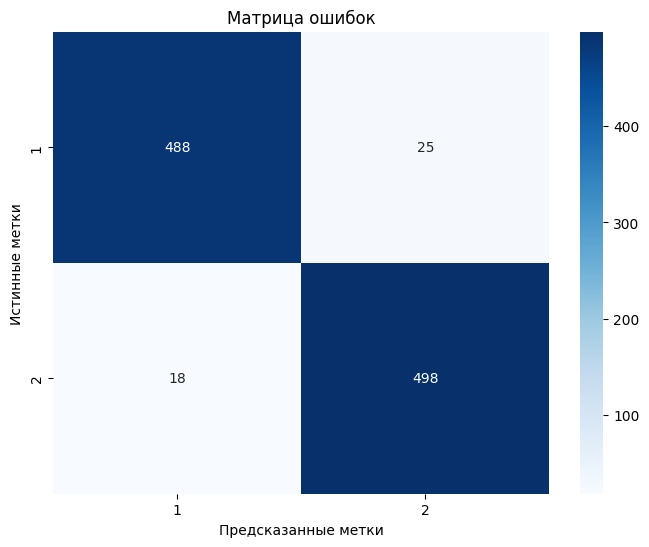

In [23]:
# Use y_test_encoded and y_pred_encoded for evaluation
accuracy = accuracy_score(y_test, y_pred_dec)
print(f"Точность ансамблевого классификатора: {accuracy:.2f}")

print("\nОтчет о классификации:")
print(classification_report(y_test, y_pred_dec))

# Построение матрицы ошибок
cm = confusion_matrix(y_test, y_pred_dec)
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=ensemble_clf.classes_,
    yticklabels=ensemble_clf.classes_
)
plt.title("Матрица ошибок")
plt.ylabel("Истинные метки")
plt.xlabel("Предсказанные метки")
plt.show()